# Avaliação e Refinamento do Modelo.

In [1]:
# Instalar bibliotecas.
#%pip install pandas matplotlib scipy scikit-learn seaborn ipywidgets

Este conjunto de dados foi hospedado no objeto IBM Cloud. Clique <a href="https://cocl.us/DA101EN_object_storage">AQUI</a> para armazenamento gratuito.


In [30]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Importanto os dados limpos.
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

#### Dropando colunas e traduzindo.

In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
termos_traduzidos = [
    'classificação', 'perdas-normalizadas', 'fabricante', 'aspiraçao', 'num-de-portas',
    'estilo-de-carro', 'tracao', 'localizacao-do-motor', 'distancia-entre-eixos', 'comprimento',
    'largura', 'altura', 'peso-do-meio-fio', 'tipo-de-motor', 'num-de-cilindros',
    'tamanho-do-motor', 'sistema-de-combustível', 'diametro-do-cilindro', 'curso-do-pistao', 'taxa-de-compressao',
    'potencia', 'rpm-pico', 'consumo-na-cidade', 'consumo-na-estrada', 'preco',
    'consumo-na-cidade-L/100km', 'potencia-categorizada', 'diesel', 'gasolina'
]
df.columns = termos_traduzidos
df.head()

,classificação,perdas-normalizadas,fabricante,aspiraçao,num-de-portas,estilo-de-carro,tracao,localizacao-do-motor,distancia-entre-eixos,comprimento,...,taxa-de-compressao,potencia,rpm-pico,consumo-na-cidade,consumo-na-estrada,preco,consumo-na-cidade-L/100km,potencia-categorizada,diesel,gasolina
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.to_csv('carros85_clean.csv')

Primeiro iremos usar somente os dados numericos

In [6]:
df=df._get_numeric_data()
df.head()

,classificação,perdas-normalizadas,distancia-entre-eixos,comprimento,largura,altura,peso-do-meio-fio,tamanho-do-motor,diametro-do-cilindro,curso-do-pistao,taxa-de-compressao,potencia,rpm-pico,consumo-na-cidade,consumo-na-estrada,preco,consumo-na-cidade-L/100km,diesel,gasolina
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


### Funções para gráficos.

In [7]:
def DistributionPlot(FuncaoVermelha, FuncaoAzul, NomeVermelho, NomeAzul, Titulo):
    largura = 12
    altura = 10
    plt.figure(figsize=(largura, altura))

    ax1 = sns.kdeplot(FuncaoVermelha, color="r", label=NomeVermelho)
    ax2 = sns.kdeplot(FuncaoAzul, color="b", label=NomeAzul, ax=ax1)

    plt.title(Titulo)
    plt.xlabel('Preco em U$')
    plt.ylabel('Proporção de Carros')
    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtreino, xteste, y_treino, y_teste, lr,poly_transform):
    largura = 12
    altura = 10
    plt.figure(figsize=(largura, altura))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtreino.values.max(), xteste.values.max()])

    xmin=min([xtreino.values.min(), xteste.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtreino, y_treino, 'ro', label='Dados de Treinamento')
    plt.plot(xteste, y_teste, 'go', label='Dados de Teste')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Função de Previsão')
    plt.ylim([-10000, 60000])
    plt.ylabel('Preço')
    plt.legend()

## Treino e Teste.

In [9]:
# dados com o target
y_data = df['preco']

In [10]:
x_data=df.drop('preco',axis=1)

In [11]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Numero de amostras de teste: ", x_teste.shape[0])
print("Numero de amostras de treino: ",x_treino.shape[0])


Numero de amostras de teste:  21
Numero de amostras de treino:  180


In [12]:
# Novo conjunto de testes
x_treino1, x_teste1, y_treino1, y_teste1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)

print("Numero de amostras de teste: ", x_teste1.shape[0])
print("Numero de amostras de treino: ",x_treino1.shape[0])


Numero de amostras de teste:  81
Numero de amostras de treino:  120


Ajustamos o modelo usando o recurso “potência”:

In [13]:
lre=LinearRegression()
lre.fit(x_treino[['potencia']], y_treino)

LinearRegression()

In [14]:
print('O coeficiente de determinação:', lre.score(x_teste[['potencia']], y_teste))

O coeficiente de determinação: 0.3635875575078824


In [15]:
print('O coeficiente de determinação:',lre.score(x_treino[['potencia']], y_treino))

O coeficiente de determinação: 0.6619724197515103


Podemos perceber que o coeficiente de determinação "R²", é muito menor utilizando as amostras de teste comparadas com as de treino.

In [16]:
lre.fit(x_treino1[['potencia']],y_treino1)
print('O coeficiente de de determinação: ', lre.score(x_teste1[['potencia']],y_teste1))

O coeficiente de de determinação:  0.7139364665406974


Para o modelo utilizando 40% do dataset o coeficiente ja sobe, ~0.71.

<h2>Cross-Validation Score</h2>


Inserimos o objeto, o recurso ("potencia") e os dados de destino (y_data). O parâmetro 'cv' determina o número de dobras. Neste caso, é 4.

In [17]:
Rcross = cross_val_score(lre, x_data[['potencia']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [18]:
print("A média das dobras ", Rcross.mean(), "e o desvio padrão " , Rcross.std())

A média das dobras  0.522009915042119 e o desvio padrão  0.2911839444756029


Podemos usar o erro quadrático negativo como pontuação definindo a métrica do parâmetro 'pontuação' como 'neg_mean_squared_error'.

In [19]:
-1 * cross_val_score(lre,x_data[['potencia']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

Agora um teste usando só 2 dobras.

In [20]:
Rc=cross_val_score(lre,x_data[['potencia']], y_data,cv=2)
Rc.mean()

0.5166761697127431

In [21]:
print("A média das dobras ", Rc.mean(), "e o desvio padrão " , Rc.std())

A média das dobras  0.5166761697127431 e o desvio padrão  0.07348004195771368


Usar a função 'cross_val_predict' para prever a saída. A função divide os dados em um número especificado de dobras, com uma dobra para teste e as outras dobras são usadas para treinamento. 

In [22]:
yhat = cross_val_predict(lre,x_data[['potencia']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting, Underfitting e Seleção de Modelo

Acontece que os dados de teste, às vezes chamados de "dados fora da amostra", são uma medida muito melhor do desempenho do seu modelo no mundo real. Uma razão para isso é o overfitting.

Vejamos alguns exemplos. Acontece que essas diferenças são mais aparentes na regressão linear múltipla e na regressão polinomial, portanto exploraremos o sobreajuste nesse contexto.

Múltiplos objetos de regressão linear e treinar o modelo usando 'cavalo-vapor', 'peso-meio-fio', 'tamanho do motor' e 'rodovia-mpg' como recursos.

In [23]:
lr = LinearRegression()
lr.fit(x_treino[['potencia', 'peso-do-meio-fio', 'tamanho-do-motor', 'consumo-na-estrada']], y_treino)

LinearRegression()

Previsão usando dados de treinamento:

In [24]:
yhat_treino = lr.predict(x_treino[['potencia', 'peso-do-meio-fio', 'tamanho-do-motor', 'consumo-na-estrada']])
yhat_treino[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Previsão usando dados de teste:

In [25]:
yhat_teste = lr.predict(x_teste[['potencia', 'peso-do-meio-fio', 'tamanho-do-motor', 'consumo-na-estrada']])
yhat_teste[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

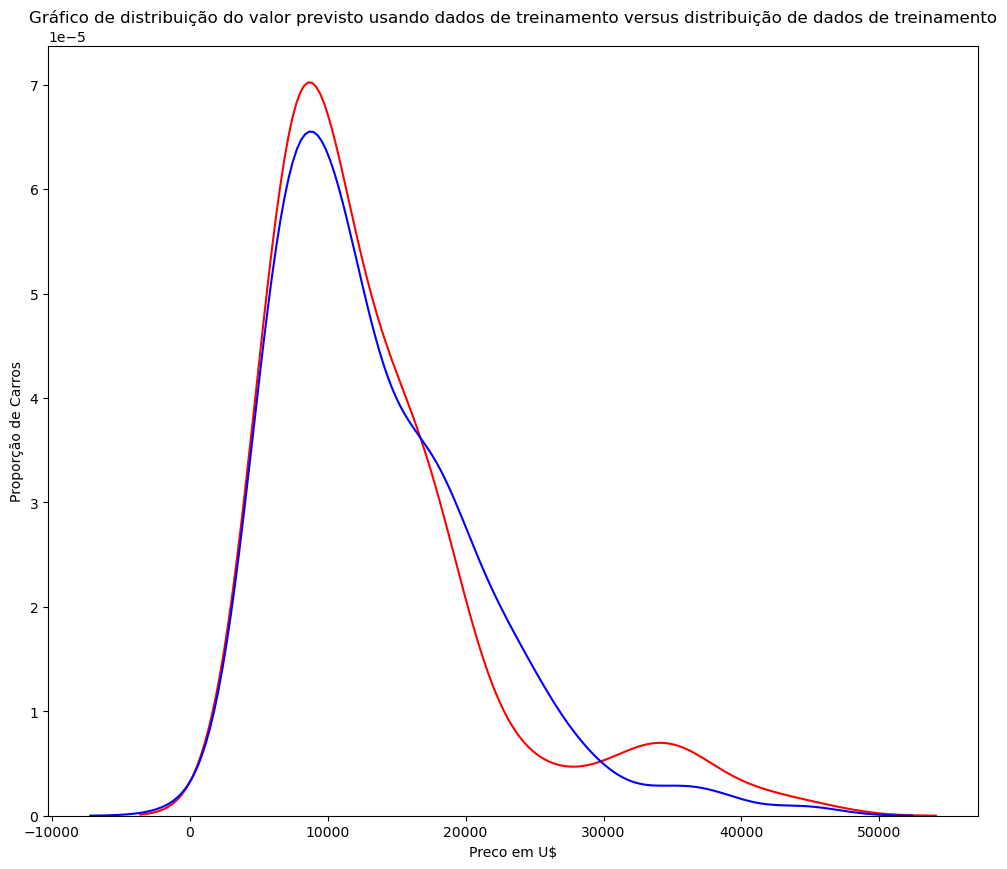

In [27]:
Title = 'Gráfico de distribuição do valor previsto usando dados de treinamento versus distribuição de dados de treinamento'
DistributionPlot(y_treino, yhat_treino, "Valores Atuais (Treino)", "Valores Previstos (Treino)", Title)

Comparação com os valores reais dos dados de treinamento.

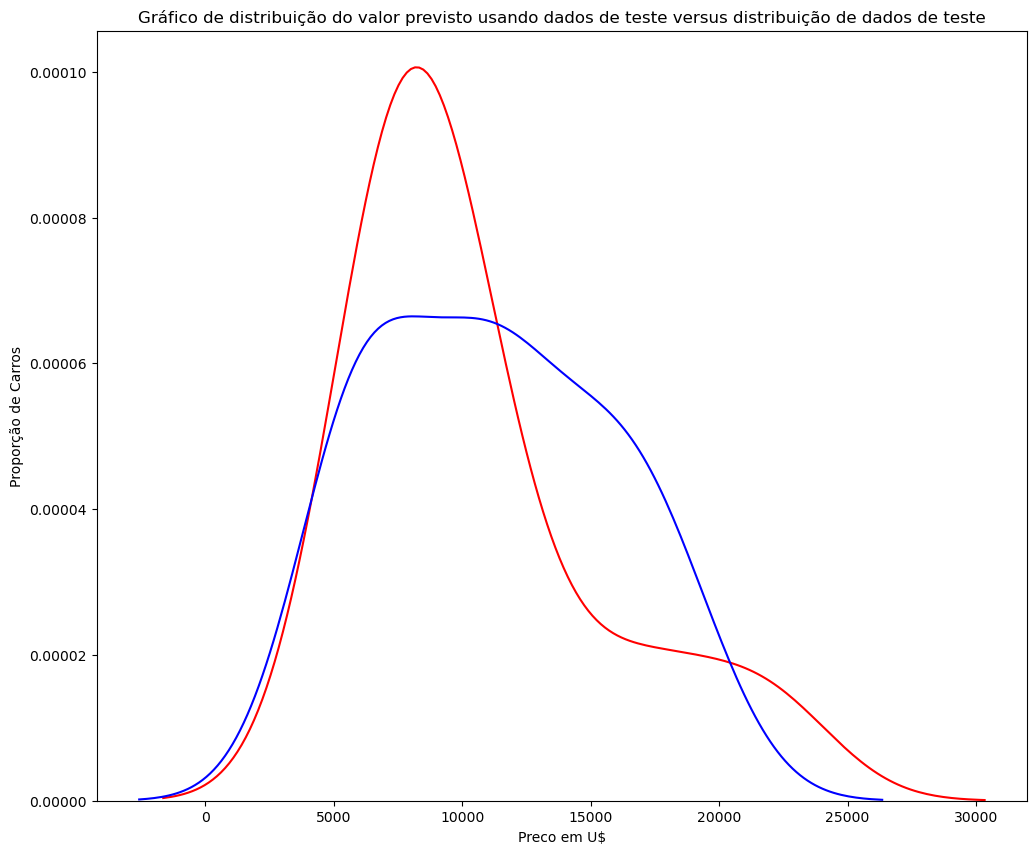

In [29]:
Title= 'Gráfico de distribuição do valor previsto usando dados de teste versus distribuição de dados de teste'
DistributionPlot(y_teste,yhat_teste,"Valores Atuais (Treino)", "Valores Previstos (Treino)",Title)

Comparando a Figura 1 e a Figura 2, é evidente que a distribuição dos dados de teste na Figura 1 é muito melhor no ajuste dos dados. Esta diferença na Figura 2 é aparente na faixa de 5.000 a 15.000. É aqui que a forma da distribuição é extremamente diferente. Vamos ver se a regressão polinomial também apresenta uma queda na precisão da previsão ao analisar o conjunto de dados de teste.

<h4> Overfitting </h4>
<p>O overfitting ocorre quando o modelo se ajusta ao ruído, mas não ao processo subjacente. Portanto, ao testar seu modelo usando o conjunto de testes, seu modelo não tem um desempenho tão bom, pois está modelando ruído, e não o processo subjacente que gerou o relacionamento. Vamos criar um modelo polinomial de grau 5.</p>

In [45]:
# Vamos usar 55% dos dados para treinamento e o restante para teste:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [46]:
# Realizaremos uma transformação polinomial de grau 5 no recurso 'cavalos de potência'.
pr = PolynomialFeatures(degree=5)
x_treino_pr = pr.fit_transform(x_train[['potencia']])
x_teste_pr = pr.fit_transform(x_test[['potencia']])
pr

PolynomialFeatures(degree=5)

In [48]:
# Agora, vamos criar um modelo de regressão linear "poly" e treiná-lo.
poly = LinearRegression()
poly.fit(x_treino_pr, y_treino)

LinearRegression()

In [49]:
# Podemos ver o resultado do nosso modelo usando o método “predict”. Atribuímos os valores a "yhat".
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.63702958,  7307.96989706, 12213.77721798, 18893.28623041,
       19995.9928222 ])

In [51]:
# Vamos pegar os primeiros cinco valores previstos e compará-los com as metas reais.
print("Valores previstos: ", yhat[0:4])
print("Valores reais: ", y_test[0:4].values)

Valores previstos:  [ 6728.63702958  7307.96989706 12213.77721798 18893.28623041]
Valores reais:  [ 6295. 10698. 13860. 13499.]


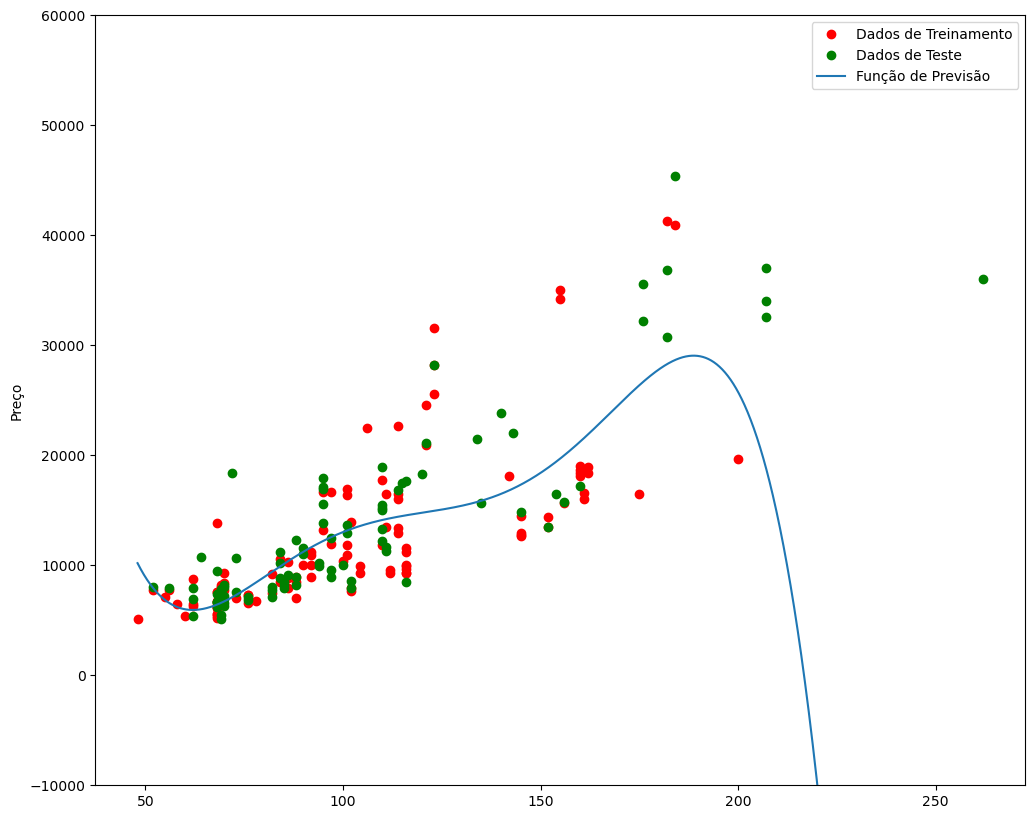

In [52]:
PollyPlot(x_treino['potencia'], x_teste['potencia'], y_treino, y_teste, poly,pr)

Um modelo de regressão polinomial onde os pontos vermelhos representam os dados de treinamento, os pontos verdes representam os dados de teste e a linha azul representa a previsão do modelo.

Vemos que a função estimada parece rastrear os dados, mas por volta de 200 cavalos de potência, a função começa a divergir dos pontos de dados.

In [54]:
# R² para dados de treino
poly.score(x_treino_pr, y_treino)

0.5567716901606525

In [55]:
# R² para dados de teste
poly.score(x_teste_pr, y_teste)

-29.871300058119907

Vemos que o R² para os dados de treinamento é 0,5567, enquanto o R² nos dados de teste foi -29,87. Quanto menor o R², pior é o modelo. Um R² negativo é um sinal de overfitting.

Vamos ver como o R² muda nos dados de teste para polinômios de ordem diferente e, em seguida, traçar os resultados:

Text(3, 0.75, 'R² máximo ')

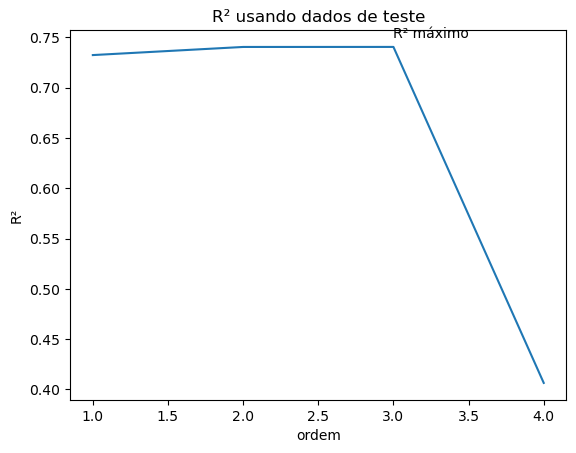

In [65]:
Rsqu_teste = []

ordem = [1, 2, 3, 4]
for n in ordem:
    pr = PolynomialFeatures(degree=n)
    
    x_treino_pr = pr.fit_transform(x_treino[['potencia']])
    
    x_teste_pr = pr.fit_transform(x_teste[['potencia']])    
    
    lr.fit(x_treino_pr, y_treino)
    
    Rsqu_teste.append(lr.score(x_teste_pr, y_teste))

plt.plot(ordem, Rsqu_teste)
plt.xlabel('ordem')
plt.ylabel('R²')
plt.title('R² usando dados de teste')
plt.text(3, 0.75, 'R² máximo ')    

Vemos que R² aumenta gradualmente até que um polinômio de ordem três seja usado. Então, o R² diminui drasticamente em um polinômio de ordem quatro.

In [68]:
def f(ordem, teste_data):
    x_treino, x_teste, y_treino, y_teste = train_test_split(x_data, y_data, test_size=teste_data, random_state=0)
    pr = PolynomialFeatures(degree=ordem)
    x_treino_pr = pr.fit_transform(x_treino[['potencia']])
    x_teste_pr = pr.fit_transform(x_teste[['potencia']])
    poly = LinearRegression()
    poly.fit(x_treino_pr,y_treino)
    PollyPlot(x_treino['potencia'], x_test['potencia'], y_treino,y_teste, poly, pr)

In [69]:
interact(f, ordem=(0, 6, 1), teste_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='ordem', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(ordem, teste_data)>